In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [ ]:
# orient='records' parameter informs each line in the file represents a JSON record
portfolio = pd.read_json("/content/drive/MyDrive/Starbucks_Dataset/customers/portfolio.json", orient="records", lines=True)
profile = pd.read_json("/content/drive/MyDrive/Starbucks_Dataset/customers/profile.json", orient="records", lines=True)
transcript = pd.read_json("/content/drive/MyDrive/Starbucks_Dataset/customers/transcript.json", orient="records", lines=True)

In [ ]:
print(portfolio.shape)
print(profile.shape)
print(transcript.shape)

(10, 6)
(17000, 5)
(306534, 4)


In [ ]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [ ]:
profile.info()
# gender and income have null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [ ]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


# First deal with transcript file

In [ ]:
transcript['value']

0         {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1         {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2         {'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3         {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4         {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}
                                ...                       
306529                      {'amount': 1.5899999999999999}
306530                                    {'amount': 9.53}
306531                                    {'amount': 3.61}
306532                      {'amount': 3.5300000000000002}
306533                                    {'amount': 4.05}
Name: value, Length: 306534, dtype: object

In [ ]:
keys = transcript['value'].apply(lambda x: x.keys())
print(keys.head())
print(type(keys))
print(keys.explode())

0    (offer id)
1    (offer id)
2    (offer id)
3    (offer id)
4    (offer id)
Name: value, dtype: object
<class 'pandas.core.series.Series'>
0         offer id
1         offer id
2         offer id
3         offer id
4         offer id
            ...   
306529      amount
306530      amount
306531      amount
306532      amount
306533      amount
Name: value, Length: 340113, dtype: object


In [ ]:
unique_keys = keys.explode().unique()
unique_keys
# here "offer_id" and "offer id" are the same concept, so we should see them as the same later on

array(['offer id', 'amount', 'offer_id', 'reward'], dtype=object)

### seperate the "value" column into three more columns : "offer_id", "amount", "reward"

## offer_id

In [ ]:
def add_offer_id_column():
  offer_id = []

  for dic in transcript.value:
    if "offer id" in list(dic.keys()):
      offer_id.append(dic["offer id"])
    elif "offer_id" in list(dic.keys()):
      offer_id.append(dic["offer_id"])
    else:
      offer_id.append(np.nan)

  return offer_id

In [ ]:
offer_id = add_offer_id_column()
len(offer_id)

306534

In [ ]:
# add new column "offer_id"
transcript["offer_id"] = offer_id
transcript.head()

,person,event,value,time,offer_id
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,2906b810c7d4411798c6938adc9daaa5
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,fafdcd668e3743c1bb461111dcafc2a4
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,4d5c57ea9a6940dd891ad53e9dbe8da0


## amount

In [ ]:
def add_amount_column():
  amount = []

  for dic in transcript.value:
    if "amount" in list(dic.keys()):
      amount.append(dic["amount"])
    else:
      amount.append(np.nan)

  return amount

In [ ]:
amount = add_amount_column()

In [ ]:
len(amount)

306534

In [ ]:
# add column "amount" to dataframe
transcript["amount"] = amount
transcript.head()

,person,event,value,time,offer_id,amount
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,2906b810c7d4411798c6938adc9daaa5,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,fafdcd668e3743c1bb461111dcafc2a4,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN


## reward

In [ ]:
def add_reward_column():
  reward = []

  for dic in transcript.value:
    if "reward" in list(dic.keys()):
      reward.append(dic["reward"])
    else:
      reward.append(np.nan)

  return reward

In [ ]:
reward = add_reward_column()

In [ ]:
len(reward)

306534

In [ ]:
# add column "reward" to dataframe
transcript["reward"] = reward
transcript.head()

,person,event,value,time,offer_id,amount,reward
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,2906b810c7d4411798c6938adc9daaa5,NaN,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN


## drop the value column since we seperate "offer_id", "amount", and "reward"

In [ ]:
transcript.drop(columns=["value"], inplace=True)
transcript.head()

,person,event,time,offer_id,amount,reward
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,NaN,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN


array([[<Axes: title={'center': 'time'}>,
        <Axes: title={'center': 'amount'}>],
       [<Axes: title={'center': 'reward'}>, <Axes: >]], dtype=object)

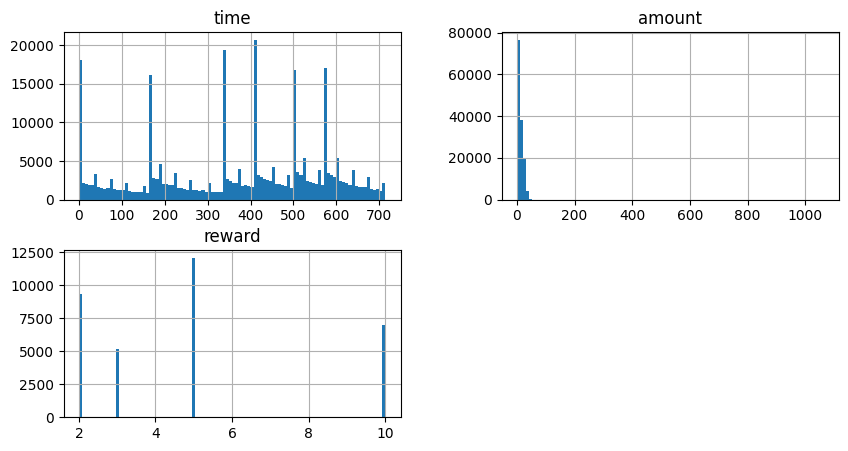

In [ ]:
transcript.hist(bins=100, figsize=(10, 5))

# There are four events: offer received, offer viewed, offer completed, and transaction

In [ ]:
transcript.event.unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

In [ ]:
offer_received = transcript[transcript["event"] == "offer received"]

In [ ]:
offer_received

,person,event,time,offer_id,amount,reward
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,NaN,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN
...,...,...,...,...,...,...
257882,d087c473b4d247ccb0abfef59ba12b0e,offer received,576,ae264e3637204a6fb9bb56bc8210ddfd,NaN,NaN
257883,cb23b66c56f64b109d673d5e56574529,offer received,576,2906b810c7d4411798c6938adc9daaa5,NaN,NaN
257884,6d5f3a774f3d4714ab0c092238f3a1d7,offer received,576,2298d6c36e964ae4a3e7e9706d1fb8c2,NaN,NaN
257885,9dc1421481194dcd9400aec7c9ae6366,offer received,576,ae264e3637204a6fb9bb56bc8210ddfd,NaN,NaN


In [ ]:
# Since "offer recieved" dont have anything do with amount and reward column.
# Because I DONT even use it, I jsut receive an offer.
# So we remove the amount and reward column

In [ ]:
offer_received.drop(columns=["amount", "reward"], inplace = True)

<ipython-input-28-cd1534522f42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offer_received.drop(columns=["amount", "reward"], inplace = True)


In [ ]:
offer_received = offer_received.rename(columns={"person" : "customer_id"})
offer_received

,customer_id,event,time,offer_id
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0
...,...,...,...,...
257882,d087c473b4d247ccb0abfef59ba12b0e,offer received,576,ae264e3637204a6fb9bb56bc8210ddfd
257883,cb23b66c56f64b109d673d5e56574529,offer received,576,2906b810c7d4411798c6938adc9daaa5
257884,6d5f3a774f3d4714ab0c092238f3a1d7,offer received,576,2298d6c36e964ae4a3e7e9706d1fb8c2
257885,9dc1421481194dcd9400aec7c9ae6366,offer received,576,ae264e3637204a6fb9bb56bc8210ddfd


## offer viewed

In [ ]:
transcript[transcript["event"] == "offer viewed"]

,person,event,time,offer_id,amount,reward
12650,389bc3fa690240e798340f5a15918d5c,offer viewed,0,f19421c1d4aa40978ebb69ca19b0e20d,NaN,NaN
12651,d1ede868e29245ea91818a903fec04c6,offer viewed,0,5a8bc65990b245e5a138643cd4eb9837,NaN,NaN
12652,102e9454054946fda62242d2e176fdce,offer viewed,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN
12653,02c083884c7d45b39cc68e1314fec56c,offer viewed,0,ae264e3637204a6fb9bb56bc8210ddfd,NaN,NaN
12655,be8a5d1981a2458d90b255ddc7e0d174,offer viewed,0,5a8bc65990b245e5a138643cd4eb9837,NaN,NaN
...,...,...,...,...,...,...
306441,d56386cf344c4829bbf420d1895dca37,offer viewed,714,5a8bc65990b245e5a138643cd4eb9837,NaN,NaN
306450,9b51e8797290403b90d09d864dec4b94,offer viewed,714,3f207df678b143eea3cee63160fa8bed,NaN,NaN
306483,84fb57a7fe8045a8bf6236738ee73a0f,offer viewed,714,5a8bc65990b245e5a138643cd4eb9837,NaN,NaN
306490,abc4359eb34e4e2ca2349da2ddf771b6,offer viewed,714,3f207df678b143eea3cee63160fa8bed,NaN,NaN


In [ ]:
offer_viewed = transcript[transcript["event"] == "offer viewed"]

In [ ]:
offer_viewed.drop(columns=["amount", "reward"], inplace=True)

<ipython-input-32-03a34d04da52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offer_viewed.drop(columns=["amount", "reward"], inplace=True)


In [ ]:
offer_viewed = offer_viewed.rename(columns={"person" : "customer_id"})
offer_viewed

,customer_id,event,time,offer_id
12650,389bc3fa690240e798340f5a15918d5c,offer viewed,0,f19421c1d4aa40978ebb69ca19b0e20d
12651,d1ede868e29245ea91818a903fec04c6,offer viewed,0,5a8bc65990b245e5a138643cd4eb9837
12652,102e9454054946fda62242d2e176fdce,offer viewed,0,4d5c57ea9a6940dd891ad53e9dbe8da0
12653,02c083884c7d45b39cc68e1314fec56c,offer viewed,0,ae264e3637204a6fb9bb56bc8210ddfd
12655,be8a5d1981a2458d90b255ddc7e0d174,offer viewed,0,5a8bc65990b245e5a138643cd4eb9837
...,...,...,...,...
306441,d56386cf344c4829bbf420d1895dca37,offer viewed,714,5a8bc65990b245e5a138643cd4eb9837
306450,9b51e8797290403b90d09d864dec4b94,offer viewed,714,3f207df678b143eea3cee63160fa8bed
306483,84fb57a7fe8045a8bf6236738ee73a0f,offer viewed,714,5a8bc65990b245e5a138643cd4eb9837
306490,abc4359eb34e4e2ca2349da2ddf771b6,offer viewed,714,3f207df678b143eea3cee63160fa8bed


## offer completed

In [ ]:
transcript[transcript["event"] == "offer completed"]

,person,event,time,offer_id,amount,reward
12658,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,0,2906b810c7d4411798c6938adc9daaa5,NaN,2.0
12672,fe97aa22dd3e48c8b143116a8403dd52,offer completed,0,fafdcd668e3743c1bb461111dcafc2a4,NaN,2.0
12679,629fc02d56414d91bca360decdfa9288,offer completed,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5.0
12692,676506bad68e4161b9bbaffeb039626b,offer completed,0,ae264e3637204a6fb9bb56bc8210ddfd,NaN,10.0
12697,8f7dd3b2afe14c078eb4f6e6fe4ba97d,offer completed,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,10.0
...,...,...,...,...,...,...
306475,0c027f5f34dd4b9eba0a25785c611273,offer completed,714,2298d6c36e964ae4a3e7e9706d1fb8c2,NaN,3.0
306497,a6f84f4e976f44508c358cc9aba6d2b3,offer completed,714,2298d6c36e964ae4a3e7e9706d1fb8c2,NaN,3.0
306506,b895c57e8cd047a8872ce02aa54759d6,offer completed,714,fafdcd668e3743c1bb461111dcafc2a4,NaN,2.0
306509,8431c16f8e1d440880db371a68f82dd0,offer completed,714,fafdcd668e3743c1bb461111dcafc2a4,NaN,2.0


In [ ]:
offer_completed = transcript[transcript["event"] == "offer completed"]

In [ ]:
# Since the customer use the offer, so they dont need to pay money, and they will get reward
# the amount should be NaN, so we should drop this column
offer_completed.amount.unique()

array([nan])

In [ ]:
offer_completed.drop(columns=["amount"], inplace=True)

<ipython-input-37-f7238201d6b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offer_completed.drop(columns=["amount"], inplace=True)


In [ ]:
offer_completed = offer_completed.rename(columns={"person" : "customer_id"})
offer_completed

,customer_id,event,time,offer_id,reward
12658,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,0,2906b810c7d4411798c6938adc9daaa5,2.0
12672,fe97aa22dd3e48c8b143116a8403dd52,offer completed,0,fafdcd668e3743c1bb461111dcafc2a4,2.0
12679,629fc02d56414d91bca360decdfa9288,offer completed,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0
12692,676506bad68e4161b9bbaffeb039626b,offer completed,0,ae264e3637204a6fb9bb56bc8210ddfd,10.0
12697,8f7dd3b2afe14c078eb4f6e6fe4ba97d,offer completed,0,4d5c57ea9a6940dd891ad53e9dbe8da0,10.0
...,...,...,...,...,...
306475,0c027f5f34dd4b9eba0a25785c611273,offer completed,714,2298d6c36e964ae4a3e7e9706d1fb8c2,3.0
306497,a6f84f4e976f44508c358cc9aba6d2b3,offer completed,714,2298d6c36e964ae4a3e7e9706d1fb8c2,3.0
306506,b895c57e8cd047a8872ce02aa54759d6,offer completed,714,fafdcd668e3743c1bb461111dcafc2a4,2.0
306509,8431c16f8e1d440880db371a68f82dd0,offer completed,714,fafdcd668e3743c1bb461111dcafc2a4,2.0


## transaction

In [ ]:
transcript[transcript["event"] == "transaction"]

,person,event,time,offer_id,amount,reward
12654,02c083884c7d45b39cc68e1314fec56c,transaction,0,NaN,0.83,NaN
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,0,NaN,34.56,NaN
12659,54890f68699049c2a04d415abc25e717,transaction,0,NaN,13.23,NaN
12670,b2f1cd155b864803ad8334cdf13c4bd2,transaction,0,NaN,19.51,NaN
12671,fe97aa22dd3e48c8b143116a8403dd52,transaction,0,NaN,18.97,NaN
...,...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,NaN,1.59,NaN
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,NaN,9.53,NaN
306531,a00058cf10334a308c68e7631c529907,transaction,714,NaN,3.61,NaN
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,NaN,3.53,NaN


In [ ]:
transaction = transcript[transcript["event"] == "transaction"]

In [ ]:
# transaction means a simple purchase without using offer.
# so there will be no information about offer_id and reward.
# we will drop it.

In [ ]:
transaction.drop(columns=["offer_id", "reward"], inplace=True)

<ipython-input-42-bb84f2cae7e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction.drop(columns=["offer_id", "reward"], inplace=True)


In [ ]:
transaction = transaction.rename(columns={"person" : "customer_id"})
transaction

,customer_id,event,time,amount
12654,02c083884c7d45b39cc68e1314fec56c,transaction,0,0.83
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,0,34.56
12659,54890f68699049c2a04d415abc25e717,transaction,0,13.23
12670,b2f1cd155b864803ad8334cdf13c4bd2,transaction,0,19.51
12671,fe97aa22dd3e48c8b143116a8403dd52,transaction,0,18.97
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,1.59
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,9.53
306531,a00058cf10334a308c68e7631c529907,transaction,714,3.61
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,3.53


# one-hot encoding for the events

In [ ]:
offer_received['offer_received'] = 1
offer_received

,customer_id,event,time,offer_id,offer_received
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,1
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,1
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,1
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,1
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,1
...,...,...,...,...,...
257882,d087c473b4d247ccb0abfef59ba12b0e,offer received,576,ae264e3637204a6fb9bb56bc8210ddfd,1
257883,cb23b66c56f64b109d673d5e56574529,offer received,576,2906b810c7d4411798c6938adc9daaa5,1
257884,6d5f3a774f3d4714ab0c092238f3a1d7,offer received,576,2298d6c36e964ae4a3e7e9706d1fb8c2,1
257885,9dc1421481194dcd9400aec7c9ae6366,offer received,576,ae264e3637204a6fb9bb56bc8210ddfd,1


In [ ]:
offer_viewed['offer_viewed'] = 1
offer_viewed

,customer_id,event,time,offer_id,offer_viewed
12650,389bc3fa690240e798340f5a15918d5c,offer viewed,0,f19421c1d4aa40978ebb69ca19b0e20d,1
12651,d1ede868e29245ea91818a903fec04c6,offer viewed,0,5a8bc65990b245e5a138643cd4eb9837,1
12652,102e9454054946fda62242d2e176fdce,offer viewed,0,4d5c57ea9a6940dd891ad53e9dbe8da0,1
12653,02c083884c7d45b39cc68e1314fec56c,offer viewed,0,ae264e3637204a6fb9bb56bc8210ddfd,1
12655,be8a5d1981a2458d90b255ddc7e0d174,offer viewed,0,5a8bc65990b245e5a138643cd4eb9837,1
...,...,...,...,...,...
306441,d56386cf344c4829bbf420d1895dca37,offer viewed,714,5a8bc65990b245e5a138643cd4eb9837,1
306450,9b51e8797290403b90d09d864dec4b94,offer viewed,714,3f207df678b143eea3cee63160fa8bed,1
306483,84fb57a7fe8045a8bf6236738ee73a0f,offer viewed,714,5a8bc65990b245e5a138643cd4eb9837,1
306490,abc4359eb34e4e2ca2349da2ddf771b6,offer viewed,714,3f207df678b143eea3cee63160fa8bed,1


In [ ]:
offer_completed['offer_completed'] = 1
offer_completed

,customer_id,event,time,offer_id,reward,offer_completed
12658,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,0,2906b810c7d4411798c6938adc9daaa5,2.0,1
12672,fe97aa22dd3e48c8b143116a8403dd52,offer completed,0,fafdcd668e3743c1bb461111dcafc2a4,2.0,1
12679,629fc02d56414d91bca360decdfa9288,offer completed,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,1
12692,676506bad68e4161b9bbaffeb039626b,offer completed,0,ae264e3637204a6fb9bb56bc8210ddfd,10.0,1
12697,8f7dd3b2afe14c078eb4f6e6fe4ba97d,offer completed,0,4d5c57ea9a6940dd891ad53e9dbe8da0,10.0,1
...,...,...,...,...,...,...
306475,0c027f5f34dd4b9eba0a25785c611273,offer completed,714,2298d6c36e964ae4a3e7e9706d1fb8c2,3.0,1
306497,a6f84f4e976f44508c358cc9aba6d2b3,offer completed,714,2298d6c36e964ae4a3e7e9706d1fb8c2,3.0,1
306506,b895c57e8cd047a8872ce02aa54759d6,offer completed,714,fafdcd668e3743c1bb461111dcafc2a4,2.0,1
306509,8431c16f8e1d440880db371a68f82dd0,offer completed,714,fafdcd668e3743c1bb461111dcafc2a4,2.0,1


## # merge these three datafrmae based on "offer_id" and "customer_id"

In [ ]:
# Why specify how="left"? Because receive a offer doesnt mean it will be seen,
# and offer being seen doesn't mean it will be used.
# So offer_received > offer_viewed > offer_completed in terms of rows.
# Therefore, to retain the information, we specify the merging method to be "left".
events = pd.merge(offer_received, offer_viewed, on=["customer_id", "offer_id"], how="left")
events

,customer_id,event_x,time_x,offer_id,offer_received,event_y,time_y,offer_viewed
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,offer viewed,6.0,1.0
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,offer viewed,6.0,1.0
2,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,offer viewed,624.0,1.0
3,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,1,offer viewed,18.0,1.0
4,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,1,offer viewed,12.0,1.0
...,...,...,...,...,...,...,...,...
95316,d087c473b4d247ccb0abfef59ba12b0e,offer received,576,ae264e3637204a6fb9bb56bc8210ddfd,1,offer viewed,672.0,1.0
95317,cb23b66c56f64b109d673d5e56574529,offer received,576,2906b810c7d4411798c6938adc9daaa5,1,NaN,NaN,NaN
95318,6d5f3a774f3d4714ab0c092238f3a1d7,offer received,576,2298d6c36e964ae4a3e7e9706d1fb8c2,1,offer viewed,588.0,1.0
95319,9dc1421481194dcd9400aec7c9ae6366,offer received,576,ae264e3637204a6fb9bb56bc8210ddfd,1,offer viewed,624.0,1.0


In [ ]:
events = pd.merge(events, offer_completed, on=["customer_id", "offer_id"], how="left")
events

,customer_id,event_x,time_x,offer_id,offer_received,event_y,time_y,offer_viewed,event,time,reward,offer_completed
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,offer viewed,6.0,1.0,offer completed,132.0,5.0,1.0
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,offer viewed,6.0,1.0,NaN,NaN,NaN,NaN
2,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,offer viewed,624.0,1.0,NaN,NaN,NaN,NaN
3,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,1,offer viewed,18.0,1.0,NaN,NaN,NaN,NaN
4,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,1,offer viewed,12.0,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
115604,d087c473b4d247ccb0abfef59ba12b0e,offer received,576,ae264e3637204a6fb9bb56bc8210ddfd,1,offer viewed,672.0,1.0,offer completed,636.0,10.0,1.0
115605,cb23b66c56f64b109d673d5e56574529,offer received,576,2906b810c7d4411798c6938adc9daaa5,1,NaN,NaN,NaN,offer completed,156.0,2.0,1.0
115606,6d5f3a774f3d4714ab0c092238f3a1d7,offer received,576,2298d6c36e964ae4a3e7e9706d1fb8c2,1,offer viewed,588.0,1.0,NaN,NaN,NaN,NaN
115607,9dc1421481194dcd9400aec7c9ae6366,offer received,576,ae264e3637204a6fb9bb56bc8210ddfd,1,offer viewed,624.0,1.0,offer completed,594.0,10.0,1.0


In [ ]:
# drop the following columns since we've already one-hot encoded it.
events.drop(columns=["event_x", "event_y", "event"], inplace=True)
events

,customer_id,time_x,offer_id,offer_received,time_y,offer_viewed,time,reward,offer_completed
0,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,6.0,1.0,132.0,5.0,1.0
1,a03223e636434f42ac4c3df47e8bac43,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,6.0,1.0,NaN,NaN,NaN
2,a03223e636434f42ac4c3df47e8bac43,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,624.0,1.0,NaN,NaN,NaN
3,e2127556f4f64592b11af22de27a7932,0,2906b810c7d4411798c6938adc9daaa5,1,18.0,1.0,NaN,NaN,NaN
4,8ec6ce2a7e7949b1bf142def7d0e0586,0,fafdcd668e3743c1bb461111dcafc2a4,1,12.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
115604,d087c473b4d247ccb0abfef59ba12b0e,576,ae264e3637204a6fb9bb56bc8210ddfd,1,672.0,1.0,636.0,10.0,1.0
115605,cb23b66c56f64b109d673d5e56574529,576,2906b810c7d4411798c6938adc9daaa5,1,NaN,NaN,156.0,2.0,1.0
115606,6d5f3a774f3d4714ab0c092238f3a1d7,576,2298d6c36e964ae4a3e7e9706d1fb8c2,1,588.0,1.0,NaN,NaN,NaN
115607,9dc1421481194dcd9400aec7c9ae6366,576,ae264e3637204a6fb9bb56bc8210ddfd,1,624.0,1.0,594.0,10.0,1.0


In [ ]:
# rename the columns for readability
events.columns = ["customer_id", "time_received", "offer_id", "offer_received", "time_viewed",
                 "offer_viewed", "time_completed", "reward", "offer_completed"]
events

,customer_id,time_received,offer_id,offer_received,time_viewed,offer_viewed,time_completed,reward,offer_completed
0,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,6.0,1.0,132.0,5.0,1.0
1,a03223e636434f42ac4c3df47e8bac43,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,6.0,1.0,NaN,NaN,NaN
2,a03223e636434f42ac4c3df47e8bac43,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,624.0,1.0,NaN,NaN,NaN
3,e2127556f4f64592b11af22de27a7932,0,2906b810c7d4411798c6938adc9daaa5,1,18.0,1.0,NaN,NaN,NaN
4,8ec6ce2a7e7949b1bf142def7d0e0586,0,fafdcd668e3743c1bb461111dcafc2a4,1,12.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
115604,d087c473b4d247ccb0abfef59ba12b0e,576,ae264e3637204a6fb9bb56bc8210ddfd,1,672.0,1.0,636.0,10.0,1.0
115605,cb23b66c56f64b109d673d5e56574529,576,2906b810c7d4411798c6938adc9daaa5,1,NaN,NaN,156.0,2.0,1.0
115606,6d5f3a774f3d4714ab0c092238f3a1d7,576,2298d6c36e964ae4a3e7e9706d1fb8c2,1,588.0,1.0,NaN,NaN,NaN
115607,9dc1421481194dcd9400aec7c9ae6366,576,ae264e3637204a6fb9bb56bc8210ddfd,1,624.0,1.0,594.0,10.0,1.0


In [ ]:
# we found that there are 6 customers do not get the offer for the time being
# there are 17,000 unique customers at the beginning
events.customer_id.nunique()

16994

## Since we are intersted in whether customers will respond or not after viewing the offer. So we will drop the offers that were not been seen.

In [ ]:
# We found some customers complete the offer before seeing the offer.
# That means he "accidently" use the offer, and we do not want that random variable, so we drop it too.
events_viewed = events[events["offer_viewed"] == 1]
events_viewed

,customer_id,time_received,offer_id,offer_received,time_viewed,offer_viewed,time_completed,reward,offer_completed
0,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,6.0,1.0,132.0,5.0,1.0
1,a03223e636434f42ac4c3df47e8bac43,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,6.0,1.0,NaN,NaN,NaN
2,a03223e636434f42ac4c3df47e8bac43,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,624.0,1.0,NaN,NaN,NaN
3,e2127556f4f64592b11af22de27a7932,0,2906b810c7d4411798c6938adc9daaa5,1,18.0,1.0,NaN,NaN,NaN
4,8ec6ce2a7e7949b1bf142def7d0e0586,0,fafdcd668e3743c1bb461111dcafc2a4,1,12.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
115602,f924927e7f844ecebf87eef93f4d2688,576,5a8bc65990b245e5a138643cd4eb9837,1,606.0,1.0,NaN,NaN,NaN
115603,a57890c3bbb7463e9018abb7fecadb15,576,5a8bc65990b245e5a138643cd4eb9837,1,576.0,1.0,NaN,NaN,NaN
115604,d087c473b4d247ccb0abfef59ba12b0e,576,ae264e3637204a6fb9bb56bc8210ddfd,1,672.0,1.0,636.0,10.0,1.0
115606,6d5f3a774f3d4714ab0c092238f3a1d7,576,2298d6c36e964ae4a3e7e9706d1fb8c2,1,588.0,1.0,NaN,NaN,NaN


In [ ]:
events_viewed["time_completed"] = events_viewed["time_completed"].fillna(8787)
events_viewed

<ipython-input-53-c310847923c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_viewed["time_completed"] = events_viewed["time_completed"].fillna(8787)


,customer_id,time_received,offer_id,offer_received,time_viewed,offer_viewed,time_completed,reward,offer_completed
0,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,6.0,1.0,132.0,5.0,1.0
1,a03223e636434f42ac4c3df47e8bac43,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,6.0,1.0,8787.0,NaN,NaN
2,a03223e636434f42ac4c3df47e8bac43,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,624.0,1.0,8787.0,NaN,NaN
3,e2127556f4f64592b11af22de27a7932,0,2906b810c7d4411798c6938adc9daaa5,1,18.0,1.0,8787.0,NaN,NaN
4,8ec6ce2a7e7949b1bf142def7d0e0586,0,fafdcd668e3743c1bb461111dcafc2a4,1,12.0,1.0,8787.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
115602,f924927e7f844ecebf87eef93f4d2688,576,5a8bc65990b245e5a138643cd4eb9837,1,606.0,1.0,8787.0,NaN,NaN
115603,a57890c3bbb7463e9018abb7fecadb15,576,5a8bc65990b245e5a138643cd4eb9837,1,576.0,1.0,8787.0,NaN,NaN
115604,d087c473b4d247ccb0abfef59ba12b0e,576,ae264e3637204a6fb9bb56bc8210ddfd,1,672.0,1.0,636.0,10.0,1.0
115606,6d5f3a774f3d4714ab0c092238f3a1d7,576,2298d6c36e964ae4a3e7e9706d1fb8c2,1,588.0,1.0,8787.0,NaN,NaN


In [ ]:
def customer_response(df):

    # view but do not use the offer
    if df["time_completed"] == 8787:
        return 0

    # view and use the offer in correct time sequence
    elif df['time_completed'] > df['time_viewed']:
        return 1

    # view and use the offer, but not in the correct time sequence(complete before view)
    else:
        return np.nan

events_viewed['customer_response'] = events_viewed.apply(customer_response, axis=1)

<ipython-input-54-0ba581352184>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_viewed['customer_response'] = events_viewed.apply(customer_response, axis=1)


In [ ]:
events_viewed

,customer_id,time_received,offer_id,offer_received,time_viewed,offer_viewed,time_completed,reward,offer_completed,customer_response
0,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,6.0,1.0,132.0,5.0,1.0,1.0
1,a03223e636434f42ac4c3df47e8bac43,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,6.0,1.0,8787.0,NaN,NaN,0.0
2,a03223e636434f42ac4c3df47e8bac43,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,624.0,1.0,8787.0,NaN,NaN,0.0
3,e2127556f4f64592b11af22de27a7932,0,2906b810c7d4411798c6938adc9daaa5,1,18.0,1.0,8787.0,NaN,NaN,0.0
4,8ec6ce2a7e7949b1bf142def7d0e0586,0,fafdcd668e3743c1bb461111dcafc2a4,1,12.0,1.0,8787.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...
115602,f924927e7f844ecebf87eef93f4d2688,576,5a8bc65990b245e5a138643cd4eb9837,1,606.0,1.0,8787.0,NaN,NaN,0.0
115603,a57890c3bbb7463e9018abb7fecadb15,576,5a8bc65990b245e5a138643cd4eb9837,1,576.0,1.0,8787.0,NaN,NaN,0.0
115604,d087c473b4d247ccb0abfef59ba12b0e,576,ae264e3637204a6fb9bb56bc8210ddfd,1,672.0,1.0,636.0,10.0,1.0,NaN
115606,6d5f3a774f3d4714ab0c092238f3a1d7,576,2298d6c36e964ae4a3e7e9706d1fb8c2,1,588.0,1.0,8787.0,NaN,NaN,0.0


In [ ]:
# drop the incorrect time sequence(complete before view)
events_viewed.dropna(subset=["customer_response"], inplace=True)
events_viewed

<ipython-input-56-df3c03ed3068>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_viewed.dropna(subset=["customer_response"], inplace=True)


,customer_id,time_received,offer_id,offer_received,time_viewed,offer_viewed,time_completed,reward,offer_completed,customer_response
0,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,6.0,1.0,132.0,5.0,1.0,1.0
1,a03223e636434f42ac4c3df47e8bac43,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,6.0,1.0,8787.0,NaN,NaN,0.0
2,a03223e636434f42ac4c3df47e8bac43,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,624.0,1.0,8787.0,NaN,NaN,0.0
3,e2127556f4f64592b11af22de27a7932,0,2906b810c7d4411798c6938adc9daaa5,1,18.0,1.0,8787.0,NaN,NaN,0.0
4,8ec6ce2a7e7949b1bf142def7d0e0586,0,fafdcd668e3743c1bb461111dcafc2a4,1,12.0,1.0,8787.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...
115600,670626b55bfb4ba39c85b27cc7cca527,576,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,624.0,1.0,666.0,5.0,1.0,1.0
115601,f924927e7f844ecebf87eef93f4d2688,576,5a8bc65990b245e5a138643cd4eb9837,1,546.0,1.0,8787.0,NaN,NaN,0.0
115602,f924927e7f844ecebf87eef93f4d2688,576,5a8bc65990b245e5a138643cd4eb9837,1,606.0,1.0,8787.0,NaN,NaN,0.0
115603,a57890c3bbb7463e9018abb7fecadb15,576,5a8bc65990b245e5a138643cd4eb9837,1,576.0,1.0,8787.0,NaN,NaN,0.0


In [ ]:
# retrain only customer_id, offer_id for merging, and customer_response for machine learning ylabel
event_cleaned = events_viewed.drop(columns=["time_received", "offer_received", "time_viewed",
                                            "offer_viewed", "time_completed", "reward", "offer_completed"])
event_cleaned

,customer_id,offer_id,customer_response
0,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0
1,a03223e636434f42ac4c3df47e8bac43,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0
2,a03223e636434f42ac4c3df47e8bac43,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0
3,e2127556f4f64592b11af22de27a7932,2906b810c7d4411798c6938adc9daaa5,0.0
4,8ec6ce2a7e7949b1bf142def7d0e0586,fafdcd668e3743c1bb461111dcafc2a4,0.0
...,...,...,...
115600,670626b55bfb4ba39c85b27cc7cca527,0b1e1539f2cc45b7b9fa7c272da2e1d7,1.0
115601,f924927e7f844ecebf87eef93f4d2688,5a8bc65990b245e5a138643cd4eb9837,0.0
115602,f924927e7f844ecebf87eef93f4d2688,5a8bc65990b245e5a138643cd4eb9837,0.0
115603,a57890c3bbb7463e9018abb7fecadb15,5a8bc65990b245e5a138643cd4eb9837,0.0


# Process the portfolio dataframe

In [ ]:
portfolio.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [ ]:
# one-hot encode the channels columns
channels = ["web", "email", "mobile", "social"]

In [ ]:
def encode_channel(channel, channel_name):
  return 1 if channel_name in channel else 0

In [ ]:
for channel in channels:
  portfolio[f'{channel}_channel'] = portfolio['channels'].apply(encode_channel, channel_name=channel)
portfolio

,reward,channels,difficulty,duration,offer_type,id,web_channel,email_channel,mobile_channel,social_channel
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,0,1,1,1
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,1,0
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,1,0
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,1,0,0
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837,0,1,1,1
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,1,0


In [ ]:
portfolio.drop(columns=["channels"], inplace=True)
portfolio

,reward,difficulty,duration,offer_type,id,web_channel,email_channel,mobile_channel,social_channel
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,0,1,1,1
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,1,0
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,1,0
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,1,0,0
5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1
6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1
7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,0,1,1,1
8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1
9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,1,0


In [ ]:
portfolio = pd.get_dummies(portfolio, columns=["offer_type"], drop_first=True)
portfolio = portfolio.rename(columns={"id":"offer_id"})
portfolio

,reward,difficulty,duration,offer_id,web_channel,email_channel,mobile_channel,social_channel,offer_type_discount,offer_type_informational
0,10,10,7,ae264e3637204a6fb9bb56bc8210ddfd,0,1,1,1,0,0
1,10,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,0,0
2,0,0,4,3f207df678b143eea3cee63160fa8bed,1,1,1,0,0,1
3,5,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,1,0,0,0
4,5,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,1,0,0,1,0
5,3,7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1,1,0
6,2,10,10,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1,1,0
7,0,0,3,5a8bc65990b245e5a138643cd4eb9837,0,1,1,1,0,1
8,5,5,5,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1,0,0
9,2,10,7,2906b810c7d4411798c6938adc9daaa5,1,1,1,0,1,0


# Processing Profile dataframe

In [ ]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [ ]:
profile.age.describe()

count    17000.000000
mean        62.531412
std         26.738580
min         18.000000
25%         45.000000
50%         58.000000
75%         73.000000
max        118.000000
Name: age, dtype: float64

In [ ]:
# We can observe that if age is 118, which doesn't make any sense, the gender and income are both NaN
print(profile[profile["age"] == 118])

print(profile[profile["age"] == 118]["age"].count())  # 2175
print(profile.gender.isna().sum())  # 2175
print(profile.income.isna().sum())  # 2175

      gender  age                                id  became_member_on  income
0       None  118  68be06ca386d4c31939f3a4f0e3dd783          20170212     NaN
2       None  118  38fe809add3b4fcf9315a9694bb96ff5          20180712     NaN
4       None  118  a03223e636434f42ac4c3df47e8bac43          20170804     NaN
6       None  118  8ec6ce2a7e7949b1bf142def7d0e0586          20170925     NaN
7       None  118  68617ca6246f4fbc85e91a2a49552598          20171002     NaN
...      ...  ...                               ...               ...     ...
16980   None  118  5c686d09ca4d475a8f750f2ba07e0440          20160901     NaN
16982   None  118  d9ca82f550ac4ee58b6299cf1e5c824a          20160415     NaN
16989   None  118  ca45ee1883624304bac1e4c8a114f045          20180305     NaN
16991   None  118  a9a20fa8b5504360beb4e7c8712f8306          20160116     NaN
16994   None  118  c02b10e8752c4d8e9b73f918558531f7          20151211     NaN

[2175 rows x 5 columns]
2175
2175
2175


In [ ]:
# Drop these ovservations since they are relatively minor to the original data
print((profile["age"] == 118).sum() / len(profile))  # 2175 / 17000
profile.dropna(subset=["gender", "income"], inplace=True)

0.12794117647058822


In [ ]:
profile

,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


### one-hot encode "gender" column

In [ ]:
print(profile["gender"].unique())
print(profile["gender"].value_counts())

['F' 'M' 'O']
M    8484
F    6129
O     212
Name: gender, dtype: int64


In [ ]:
profile = pd.get_dummies(profile, columns=["gender"], drop_first=True)
profile

,age,id,became_member_on,income,gender_M,gender_O
1,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,0,0
3,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,0,0
5,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0,1,0
8,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0,1,0
12,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0,1,0
...,...,...,...,...,...,...
16995,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0,0,0
16996,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0,1,0
16997,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0,1,0
16998,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0,0,0


### Let's deal with the date


In [ ]:
# "became_member_on" is interger
profile.became_member_on.dtypes

dtype('int64')

In [ ]:
profile["time"] = pd.to_datetime(profile.became_member_on, format='%Y%m%d')
profile

,age,id,became_member_on,income,gender_M,gender_O,time
1,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,0,0,2017-07-15
3,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,0,0,2017-05-09
5,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0,1,0,2018-04-26
8,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0,1,0,2018-02-09
12,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0,1,0,2017-11-11
...,...,...,...,...,...,...,...
16995,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0,0,0,2018-06-04
16996,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0,1,0,2018-07-13
16997,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0,1,0,2017-01-26
16998,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0,0,0,2016-03-07


In [ ]:
print(profile["time"].max())
print(profile["time"].min())
print(profile["time"].max() - profile["time"].min())

2018-07-26 00:00:00
2013-07-29 00:00:00
1823 days 00:00:00


In [ ]:
time_point = pd.to_datetime("12/31/2018")
print(time_point)

def calculate_days(row):
    time_diff = (time_point - row['time']).days
    return time_diff

profile['days_as_member'] = profile.apply(calculate_days, axis=1)

2018-12-31 00:00:00


In [ ]:
profile

,age,id,became_member_on,income,gender_M,gender_O,time,days_as_member
1,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,0,0,2017-07-15,534
3,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,0,0,2017-05-09,601
5,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0,1,0,2018-04-26,249
8,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0,1,0,2018-02-09,325
12,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0,1,0,2017-11-11,415
...,...,...,...,...,...,...,...,...
16995,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0,0,0,2018-06-04,210
16996,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0,1,0,2018-07-13,171
16997,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0,1,0,2017-01-26,704
16998,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0,0,0,2016-03-07,1029


In [ ]:
'''
profile["year"] = profile.time.dt.year
profile["month"] = profile.time.dt.month
profile["day"] = profile.time.dt.day
profile
'''

'\nprofile["year"] = profile.time.dt.year\nprofile["month"] = profile.time.dt.month\nprofile["day"] = profile.time.dt.day\nprofile\n'

In [ ]:
profile = profile.drop(columns=["became_member_on", "time"])
profile = profile.rename(columns={"id":"customer_id"})
profile

,age,customer_id,income,gender_M,gender_O,days_as_member
1,55,0610b486422d4921ae7d2bf64640c50b,112000.0,0,0,534
3,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,0,0,601
5,68,e2127556f4f64592b11af22de27a7932,70000.0,1,0,249
8,65,389bc3fa690240e798340f5a15918d5c,53000.0,1,0,325
12,58,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,1,0,415
...,...,...,...,...,...,...
16995,45,6d5f3a774f3d4714ab0c092238f3a1d7,54000.0,0,0,210
16996,61,2cb4f97358b841b9a9773a7aa05a9d77,72000.0,1,0,171
16997,49,01d26f638c274aa0b965d24cefe3183f,73000.0,1,0,704
16998,83,9dc1421481194dcd9400aec7c9ae6366,50000.0,0,0,1029


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'income'}>],
       [<Axes: title={'center': 'days_as_member'}>, <Axes: >]],
      dtype=object)

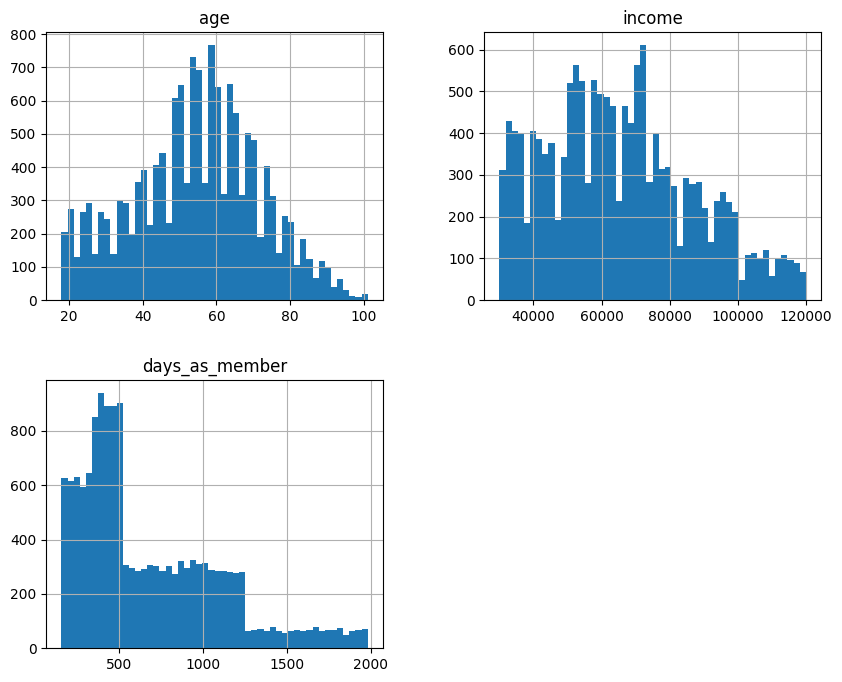

In [ ]:
profile[["age", "income", "days_as_member"]].hist(bins=50, figsize=(10,8))

In [ ]:
# We can use the transaction dataframe extracted from transcript df to gain more information
transaction

,customer_id,event,time,amount
12654,02c083884c7d45b39cc68e1314fec56c,transaction,0,0.83
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,0,34.56
12659,54890f68699049c2a04d415abc25e717,transaction,0,13.23
12670,b2f1cd155b864803ad8334cdf13c4bd2,transaction,0,19.51
12671,fe97aa22dd3e48c8b143116a8403dd52,transaction,0,18.97
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,1.59
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,9.53
306531,a00058cf10334a308c68e7631c529907,transaction,714,3.61
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,3.53


### Since one customer can purchase more than one time, we want to calaulate the number of transaction. And also how much a customer spend (total_amount)

In [ ]:
total_amount = pd.DataFrame(transaction.groupby(["customer_id"]).amount.sum().sort_values(ascending=False))
# reset the index
total_amount = total_amount.reset_index(level=0)
total_amount

,customer_id,amount
0,3c8d541112a74af99e88abbd0692f00e,1608.69
1,f1d65ae63f174b8f80fa063adcaa63b7,1365.66
2,ae6f43089b674728a50b8727252d3305,1327.74
3,626df8678e2a4953b9098246418c9cfa,1321.42
4,73afdeca19e349b98f09e928644610f8,1319.97
...,...,...
16573,37ca07481c124d98ac1eaca5ee1f4146,0.10
16574,4828b93dd6dd44eb9ec8417f0564a9b9,0.05
16575,11d87e606c2f4d649fe09a5e84d048c2,0.05
16576,999338157fd54f639b089cef0038e06a,0.05


In [ ]:
profile = pd.merge(profile, total_amount, how="left")
profile = profile.rename(columns={"amount":"total_amount"})
profile

,age,customer_id,income,gender_M,gender_O,days_as_member,total_amount
0,55,0610b486422d4921ae7d2bf64640c50b,112000.0,0,0,534,77.01
1,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,0,0,601,159.27
2,68,e2127556f4f64592b11af22de27a7932,70000.0,1,0,249,57.73
3,65,389bc3fa690240e798340f5a15918d5c,53000.0,1,0,325,36.43
4,58,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,1,0,415,15.62
...,...,...,...,...,...,...,...
14820,45,6d5f3a774f3d4714ab0c092238f3a1d7,54000.0,0,0,210,20.03
14821,61,2cb4f97358b841b9a9773a7aa05a9d77,72000.0,1,0,171,25.97
14822,49,01d26f638c274aa0b965d24cefe3183f,73000.0,1,0,704,39.74
14823,83,9dc1421481194dcd9400aec7c9ae6366,50000.0,0,0,1029,189.67


In [ ]:
number_of_transaction = pd.DataFrame(transaction.groupby(["customer_id"]).size().sort_values(ascending=False))
number_of_transaction = number_of_transaction.reset_index()
number_of_transaction

,customer_id,0
0,79d9d4f86aca4bed9290350fb43817c2,36
1,8dbfa485249f409aa223a2130f40634a,36
2,94de646f7b6041228ca7dec82adb97d2,35
3,b1f4ece7d49342628a9ed77aee2cde58,32
4,5e60c6aa3b834e44b822ea43a3efea26,32
...,...,...
16573,3bc7544c64164046a017fa6c20d65a6c,1
16574,3be15bacb2064198874cbf898ca5cf82,1
16575,3bfb6c8c7d8d42e68c9f66d296a1c96b,1
16576,b8725275fd214d7ab37d31d365866d54,1


In [ ]:
profile = pd.merge(profile, number_of_transaction, how="left")
profile = profile.rename(columns={profile.columns[-1]:"number_of_transaction"})
profile

,age,customer_id,income,gender_M,gender_O,days_as_member,total_amount,number_of_transaction
0,55,0610b486422d4921ae7d2bf64640c50b,112000.0,0,0,534,77.01,3.0
1,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,0,0,601,159.27,7.0
2,68,e2127556f4f64592b11af22de27a7932,70000.0,1,0,249,57.73,3.0
3,65,389bc3fa690240e798340f5a15918d5c,53000.0,1,0,325,36.43,3.0
4,58,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,1,0,415,15.62,4.0
...,...,...,...,...,...,...,...,...
14820,45,6d5f3a774f3d4714ab0c092238f3a1d7,54000.0,0,0,210,20.03,7.0
14821,61,2cb4f97358b841b9a9773a7aa05a9d77,72000.0,1,0,171,25.97,7.0
14822,49,01d26f638c274aa0b965d24cefe3183f,73000.0,1,0,704,39.74,8.0
14823,83,9dc1421481194dcd9400aec7c9ae6366,50000.0,0,0,1029,189.67,14.0


In [ ]:
# 333 customers do not bother spending any money in Starbucks
profile.isna().sum()

age                        0
customer_id                0
income                     0
gender_M                   0
gender_O                   0
days_as_member             0
total_amount             333
number_of_transaction    333
dtype: int64

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'income'}>],
       [<Axes: title={'center': 'days_as_member'}>,
        <Axes: title={'center': 'total_amount'}>],
       [<Axes: title={'center': 'number_of_transaction'}>, <Axes: >]],
      dtype=object)

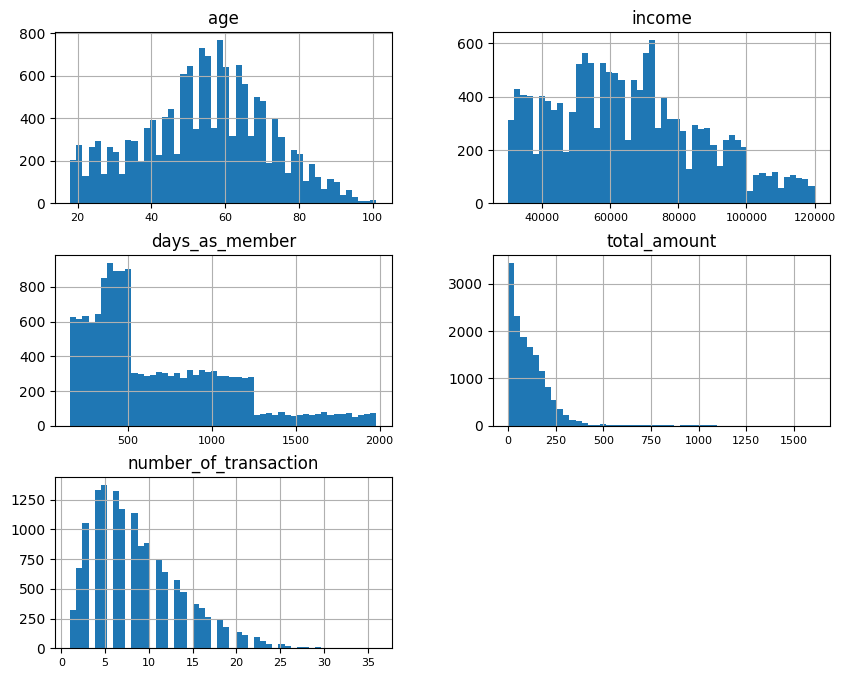

In [ ]:
profile[["age", "income", "days_as_member", "total_amount", "number_of_transaction"]].hist(
    bins=50, figsize=(10,8), xlabelsize=8)

# Merge all dataframe

In [ ]:
# The event_cleaned df shows the customers whether complete(use) the offer after viewing the offer.
event_cleaned

,customer_id,offer_id,customer_response
0,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0
1,a03223e636434f42ac4c3df47e8bac43,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0
2,a03223e636434f42ac4c3df47e8bac43,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0
3,e2127556f4f64592b11af22de27a7932,2906b810c7d4411798c6938adc9daaa5,0.0
4,8ec6ce2a7e7949b1bf142def7d0e0586,fafdcd668e3743c1bb461111dcafc2a4,0.0
...,...,...,...
115600,670626b55bfb4ba39c85b27cc7cca527,0b1e1539f2cc45b7b9fa7c272da2e1d7,1.0
115601,f924927e7f844ecebf87eef93f4d2688,5a8bc65990b245e5a138643cd4eb9837,0.0
115602,f924927e7f844ecebf87eef93f4d2688,5a8bc65990b245e5a138643cd4eb9837,0.0
115603,a57890c3bbb7463e9018abb7fecadb15,5a8bc65990b245e5a138643cd4eb9837,0.0


In [ ]:
profile

,age,customer_id,income,gender_M,gender_O,days_as_member,total_amount,number_of_transaction
0,55,0610b486422d4921ae7d2bf64640c50b,112000.0,0,0,534,77.01,3.0
1,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,0,0,601,159.27,7.0
2,68,e2127556f4f64592b11af22de27a7932,70000.0,1,0,249,57.73,3.0
3,65,389bc3fa690240e798340f5a15918d5c,53000.0,1,0,325,36.43,3.0
4,58,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,1,0,415,15.62,4.0
...,...,...,...,...,...,...,...,...
14820,45,6d5f3a774f3d4714ab0c092238f3a1d7,54000.0,0,0,210,20.03,7.0
14821,61,2cb4f97358b841b9a9773a7aa05a9d77,72000.0,1,0,171,25.97,7.0
14822,49,01d26f638c274aa0b965d24cefe3183f,73000.0,1,0,704,39.74,8.0
14823,83,9dc1421481194dcd9400aec7c9ae6366,50000.0,0,0,1029,189.67,14.0


In [ ]:
portfolio

,reward,difficulty,duration,offer_id,web_channel,email_channel,mobile_channel,social_channel,offer_type_discount,offer_type_informational
0,10,10,7,ae264e3637204a6fb9bb56bc8210ddfd,0,1,1,1,0,0
1,10,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,0,0
2,0,0,4,3f207df678b143eea3cee63160fa8bed,1,1,1,0,0,1
3,5,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,1,0,0,0
4,5,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,1,0,0,1,0
5,3,7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1,1,0
6,2,10,10,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1,1,0
7,0,0,3,5a8bc65990b245e5a138643cd4eb9837,0,1,1,1,0,1
8,5,5,5,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1,0,0
9,2,10,7,2906b810c7d4411798c6938adc9daaa5,1,1,1,0,1,0


In [ ]:
df = event_cleaned.merge(profile, how="left")
df.isna().sum() # why is there NaN value???

customer_id                  0
offer_id                     0
customer_response            0
age                      10852
income                   10852
gender_M                 10852
gender_O                 10852
days_as_member           10852
total_amount             12392
number_of_transaction    12392
dtype: int64

In [ ]:
df = df.dropna()
df

,customer_id,offer_id,customer_response,age,income,gender_M,gender_O,days_as_member,total_amount,number_of_transaction
0,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0,75.0,100000.0,0.0,0.0,601.0,159.27,7.0
3,e2127556f4f64592b11af22de27a7932,2906b810c7d4411798c6938adc9daaa5,0.0,68.0,70000.0,1.0,0.0,249.0,57.73,3.0
7,389bc3fa690240e798340f5a15918d5c,f19421c1d4aa40978ebb69ca19b0e20d,1.0,65.0,53000.0,1.0,0.0,325.0,36.43,3.0
8,389bc3fa690240e798340f5a15918d5c,f19421c1d4aa40978ebb69ca19b0e20d,1.0,65.0,53000.0,1.0,0.0,325.0,36.43,3.0
9,389bc3fa690240e798340f5a15918d5c,f19421c1d4aa40978ebb69ca19b0e20d,1.0,65.0,53000.0,1.0,0.0,325.0,36.43,3.0
...,...,...,...,...,...,...,...,...,...,...
78754,670626b55bfb4ba39c85b27cc7cca527,0b1e1539f2cc45b7b9fa7c272da2e1d7,1.0,21.0,39000.0,1.0,0.0,964.0,125.92,15.0
78755,f924927e7f844ecebf87eef93f4d2688,5a8bc65990b245e5a138643cd4eb9837,0.0,47.0,93000.0,1.0,0.0,946.0,266.11,11.0
78756,f924927e7f844ecebf87eef93f4d2688,5a8bc65990b245e5a138643cd4eb9837,0.0,47.0,93000.0,1.0,0.0,946.0,266.11,11.0
78757,a57890c3bbb7463e9018abb7fecadb15,5a8bc65990b245e5a138643cd4eb9837,0.0,57.0,77000.0,1.0,0.0,355.0,230.72,10.0


In [ ]:
df_cleaned = df.merge(portfolio, how="left")
df_cleaned.isna().sum()

customer_id                 0
offer_id                    0
customer_response           0
age                         0
income                      0
gender_M                    0
gender_O                    0
days_as_member              0
total_amount                0
number_of_transaction       0
reward                      0
difficulty                  0
duration                    0
web_channel                 0
email_channel               0
mobile_channel              0
social_channel              0
offer_type_discount         0
offer_type_informational    0
dtype: int64

In [ ]:
df_cleaned

,customer_id,offer_id,customer_response,age,income,gender_M,gender_O,days_as_member,total_amount,number_of_transaction,reward,difficulty,duration,web_channel,email_channel,mobile_channel,social_channel,offer_type_discount,offer_type_informational
0,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0,75.0,100000.0,0.0,0.0,601.0,159.27,7.0,5,5,7,1,1,1,0,0,0
1,e2127556f4f64592b11af22de27a7932,2906b810c7d4411798c6938adc9daaa5,0.0,68.0,70000.0,1.0,0.0,249.0,57.73,3.0,2,10,7,1,1,1,0,1,0
2,389bc3fa690240e798340f5a15918d5c,f19421c1d4aa40978ebb69ca19b0e20d,1.0,65.0,53000.0,1.0,0.0,325.0,36.43,3.0,5,5,5,1,1,1,1,0,0
3,389bc3fa690240e798340f5a15918d5c,f19421c1d4aa40978ebb69ca19b0e20d,1.0,65.0,53000.0,1.0,0.0,325.0,36.43,3.0,5,5,5,1,1,1,1,0,0
4,389bc3fa690240e798340f5a15918d5c,f19421c1d4aa40978ebb69ca19b0e20d,1.0,65.0,53000.0,1.0,0.0,325.0,36.43,3.0,5,5,5,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66362,670626b55bfb4ba39c85b27cc7cca527,0b1e1539f2cc45b7b9fa7c272da2e1d7,1.0,21.0,39000.0,1.0,0.0,964.0,125.92,15.0,5,20,10,1,1,0,0,1,0
66363,f924927e7f844ecebf87eef93f4d2688,5a8bc65990b245e5a138643cd4eb9837,0.0,47.0,93000.0,1.0,0.0,946.0,266.11,11.0,0,0,3,0,1,1,1,0,1
66364,f924927e7f844ecebf87eef93f4d2688,5a8bc65990b245e5a138643cd4eb9837,0.0,47.0,93000.0,1.0,0.0,946.0,266.11,11.0,0,0,3,0,1,1,1,0,1
66365,a57890c3bbb7463e9018abb7fecadb15,5a8bc65990b245e5a138643cd4eb9837,0.0,57.0,77000.0,1.0,0.0,355.0,230.72,10.0,0,0,3,0,1,1,1,0,1


# Machine learning

In [ ]:
df_cleaned.iloc[:,2:]

,customer_response,age,income,gender_M,gender_O,days_as_member,total_amount,number_of_transaction,reward,difficulty,duration,web_channel,email_channel,mobile_channel,social_channel,offer_type_discount,offer_type_informational
0,1.0,75.0,100000.0,0.0,0.0,601.0,159.27,7.0,5,5,7,1,1,1,0,0,0
1,0.0,68.0,70000.0,1.0,0.0,249.0,57.73,3.0,2,10,7,1,1,1,0,1,0
2,1.0,65.0,53000.0,1.0,0.0,325.0,36.43,3.0,5,5,5,1,1,1,1,0,0
3,1.0,65.0,53000.0,1.0,0.0,325.0,36.43,3.0,5,5,5,1,1,1,1,0,0
4,1.0,65.0,53000.0,1.0,0.0,325.0,36.43,3.0,5,5,5,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66362,1.0,21.0,39000.0,1.0,0.0,964.0,125.92,15.0,5,20,10,1,1,0,0,1,0
66363,0.0,47.0,93000.0,1.0,0.0,946.0,266.11,11.0,0,0,3,0,1,1,1,0,1
66364,0.0,47.0,93000.0,1.0,0.0,946.0,266.11,11.0,0,0,3,0,1,1,1,0,1
66365,0.0,57.0,77000.0,1.0,0.0,355.0,230.72,10.0,0,0,3,0,1,1,1,0,1


In [ ]:
X = df_cleaned.iloc[:,3:]
X.shape

(66367, 16)

In [ ]:
y = df_cleaned["customer_response"]
y

0        1.0
1        0.0
2        1.0
3        1.0
4        1.0
        ... 
66362    1.0
66363    0.0
66364    0.0
66365    0.0
66366    0.0
Name: customer_response, Length: 66367, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=8787)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(46456, 16)
(19911, 16)
(46456,)
(19911,)


# DNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import regularizers

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(16,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
def lr_scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [ ]:
lr_schedule = LearningRateScheduler(lr_scheduler)
initial_learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[lr_schedule, early_stopping])

Epoch 1/50
1452/1452 [==============================] - 4s 3ms/step - loss: 12.0994 - accuracy: 0.5734 - val_loss: 0.5772 - val_accuracy: 0.7500 - lr: 8.1873e-04
Epoch 2/50
1452/1452 [==============================] - 5s 4ms/step - loss: 0.9569 - accuracy: 0.6295 - val_loss: 0.8307 - val_accuracy: 0.5434 - lr: 8.1873e-04
Epoch 3/50
1452/1452 [==============================] - 4s 3ms/step - loss: 1.6624 - accuracy: 0.6018 - val_loss: 0.5460 - val_accuracy: 0.7594 - lr: 8.1873e-04
Epoch 4/50
1452/1452 [==============================] - 3s 2ms/step - loss: 0.6381 - accuracy: 0.6835 - val_loss: 0.5716 - val_accuracy: 0.7112 - lr: 8.1873e-04
Epoch 5/50
1452/1452 [==============================] - 4s 3ms/step - loss: 0.6378 - accuracy: 0.6843 - val_loss: 0.5355 - val_accuracy: 0.7543 - lr: 8.1873e-04
Epoch 6/50
1452/1452 [==============================] - 5s 3ms/step - loss: 0.7154 - accuracy: 0.6714 - val_loss: 0.6180 - val_accuracy: 0.6567 - lr: 7.4082e-04
Epoch 7/50
1452/1452 [===========

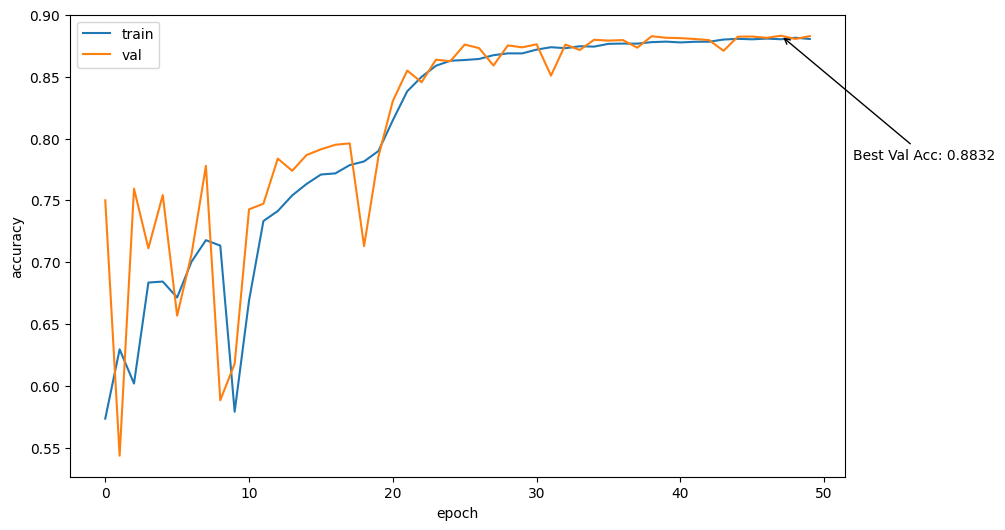

Best Validation Accuracy: 0.8832


In [ ]:
# Assuming 'history' is a dictionary or object containing the training history

plt.figure(figsize=[10, 6])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'])

# Find the index of the maximum validation accuracy
best_val_accuracy_index = history.history['val_accuracy'].index(max(history.history['val_accuracy']))

# Get the best validation accuracy
best_val_accuracy = history.history['val_accuracy'][best_val_accuracy_index]

# Annotate the best validation accuracy on the plot
plt.annotate(f'Best Val Acc: {best_val_accuracy:.4f}',
             xy=(best_val_accuracy_index, best_val_accuracy),
             xytext=(best_val_accuracy_index + 5, best_val_accuracy - 0.1),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.show()

# Print the best validation accuracy score
print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")

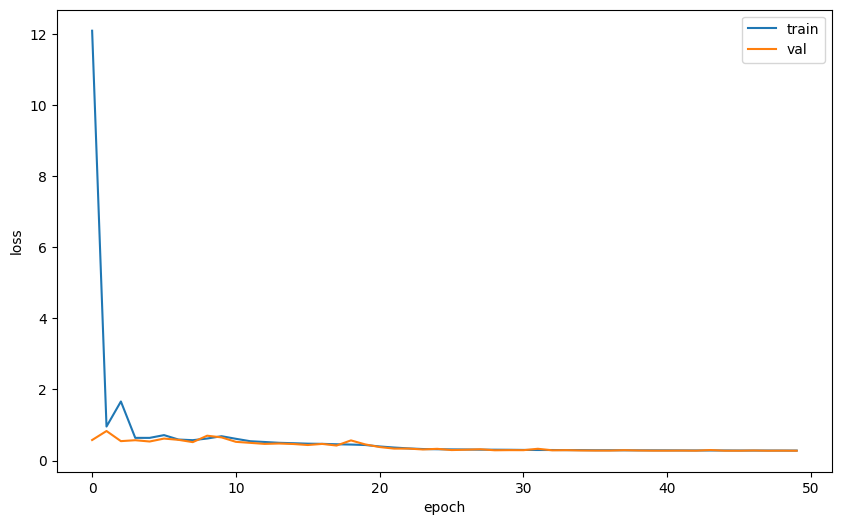

In [ ]:
plt.figure(figsize=[10, 6])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
result = clf.fit(X_train, y_train)
result

RandomForestClassifier()

In [ ]:
pred = clf.predict(X_val)
pred

array([0., 1., 0., ..., 0., 1., 1.])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, pred)
print('Val_Accuracy: ', accuracy)

Val_Accuracy:  0.9341569986439656


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val,pred))

              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92      7998
         1.0       0.93      0.96      0.95     11913

    accuracy                           0.93     19911
   macro avg       0.94      0.93      0.93     19911
weighted avg       0.93      0.93      0.93     19911



Val_Accuracy:  0.9341569986439656


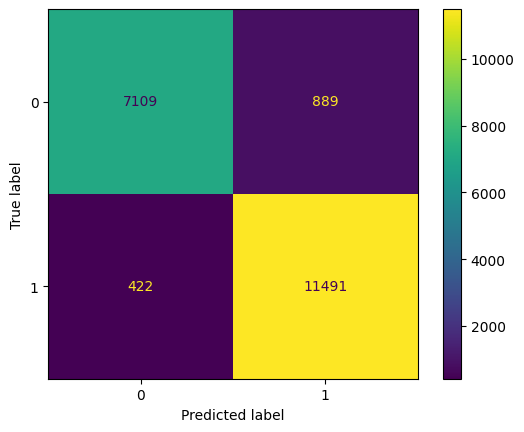

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Generate predictions with the best model
y_pred = clf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print('Val_Accuracy: ', accuracy)

# Create the confusion matrix
cm = confusion_matrix(y_val, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

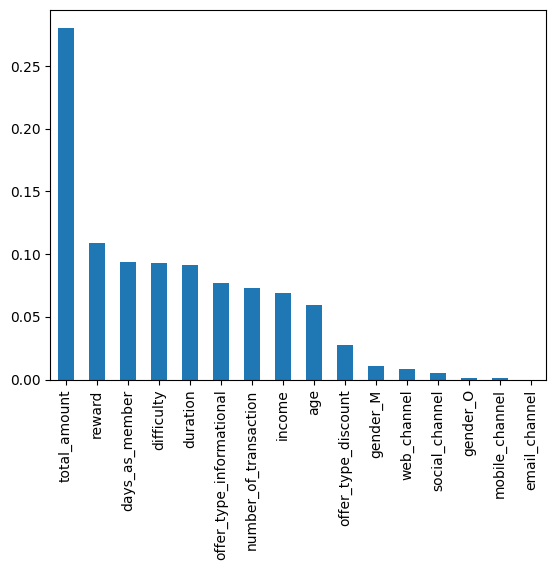

In [ ]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
param_grid = {
	'n_estimators': [25, 50, 100, 150],
	'max_features': ['sqrt', 'log2', None],
	'max_depth': [3, 6, 9],
	'max_leaf_nodes': [3, 6, 9],
}

In [ ]:
grid_search = GridSearchCV(RandomForestClassifier(),
						param_grid=param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=9,
                       n_estimators=150)


In [ ]:
model_grid = RandomForestClassifier(max_depth=6,
									max_features="log2",
									max_leaf_nodes=9,
									n_estimators=150)
model_grid.fit(X_train, y_train)
y_pred_grid = clf.predict(X_val)
print(classification_report(y_pred_grid, y_val))

              precision    recall  f1-score   support

         0.0       0.89      0.94      0.92      7531
         1.0       0.96      0.93      0.95     12380

    accuracy                           0.93     19911
   macro avg       0.93      0.94      0.93     19911
weighted avg       0.94      0.93      0.93     19911



In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 11, 'n_estimators': 163}
